## 📥 Carga de Datos
> Importación de los distintos archivos .csv desde Google Drive y verificación inicial de estructura.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df_calendar = pd.read_csv('/content/drive/MyDrive/Datasets/calendar.csv.gz')
df_reviews = pd.read_csv('/content/drive/MyDrive/Datasets/reviews.csv.gz')
df_listings = pd.read_csv('/content/drive/MyDrive/Datasets/listings.csv.gz')
df_neighbourhoods = pd.read_csv('/content/drive/MyDrive/Datasets/neighbourhoods.csv')

Mounted at /content/drive


#🧹 EDA y Limpieza de Tipos de Datos
### Analisis Exploratorio de Datos y transformación de variables


### ***df_calendar***

In [ ]:
display(df_calendar.head())
display(df_calendar.info(verbose=True, show_counts=True))
display(df_calendar.describe())
display(df_calendar.shape)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11508,2025-01-30,f,$60.00,NaN,3.0,1125.0
1,11508,2025-01-31,f,$60.00,NaN,3.0,1125.0
2,11508,2025-02-01,f,$60.00,NaN,3.0,1125.0
3,11508,2025-02-02,f,$60.00,NaN,3.0,1125.0
4,11508,2025-02-03,f,$60.00,NaN,3.0,1125.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12837777 entries, 0 to 12837776
Data columns (total 7 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   listing_id      12837777 non-null  int64  
 1   date            12837777 non-null  object 
 2   available       12837777 non-null  object 
 3   price           12837777 non-null  object 
 4   adjusted_price  0 non-null         float64
 5   minimum_nights  12837763 non-null  float64
 6   maximum_nights  12837763 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 685.6+ MB


None

,listing_id,adjusted_price,minimum_nights,maximum_nights
count,1.283778e+07,0.0,1.283776e+07,1.283776e+07
mean,7.117867e+17,NaN,6.025412e+00,6.112193e+02
std,4.840909e+17,NaN,2.418471e+01,4.453138e+02
min,1.150800e+04,NaN,1.000000e+00,1.000000e+00
25%,4.719456e+07,NaN,2.000000e+00,3.650000e+02
50%,8.875646e+17,NaN,2.000000e+00,3.650000e+02
75%,1.095203e+18,NaN,4.000000e+00,1.125000e+03
max,1.344330e+18,NaN,1.000000e+03,1.825000e+03


(12837777, 7)

In [ ]:
#sacamos el simbolo de $ en price y available lo hacemos bool, date en formato date
df_calendar['price'] = df_calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_calendar['available'] = df_calendar['available'].map({'t': True, 'f': False})
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

#eliminamos adjusted price ya que no contiene valores
df_calendar = df_calendar.drop('adjusted_price', axis=1)

df_calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,11508,2025-01-30,False,60.0,3.0,1125.0
1,11508,2025-01-31,False,60.0,3.0,1125.0
2,11508,2025-02-01,False,60.0,3.0,1125.0
3,11508,2025-02-02,False,60.0,3.0,1125.0
4,11508,2025-02-03,False,60.0,3.0,1125.0


In [ ]:
from IPython.display import display

display(df_calendar.loc[df_calendar['price'] <= 0])
display(df_calendar.loc[df_calendar['minimum_nights'] <= 0])
display(df_calendar.loc[df_calendar['maximum_nights'] <= 0])
display(df_calendar.loc[df_calendar['minimum_nights'] > df_calendar['maximum_nights']])


,listing_id,date,available,price,minimum_nights,maximum_nights
947288,16119052,2025-01-29,False,0.0,5.0,30.0
947289,16119052,2025-01-30,False,0.0,5.0,30.0
947290,16119052,2025-01-31,True,0.0,5.0,30.0
947291,16119052,2025-02-01,True,0.0,5.0,30.0
947292,16119052,2025-02-02,True,0.0,5.0,30.0
...,...,...,...,...,...,...
3031107,43112374,2026-01-24,True,0.0,7.0,1125.0
3031108,43112374,2026-01-25,True,0.0,7.0,1125.0
3031109,43112374,2026-01-26,True,0.0,7.0,1125.0
3031110,43112374,2026-01-27,True,0.0,7.0,1125.0


,listing_id,date,available,price,minimum_nights,maximum_nights


,listing_id,date,available,price,minimum_nights,maximum_nights


,listing_id,date,available,price,minimum_nights,maximum_nights


In [ ]:
#los que tienen price <= 0 los pasamos a null
#porcentaje de valores con 0 sobre el total
print(f"Porcentaje total de valores con precio igual a 0: {(df_calendar.loc[df_calendar['price'] <= 0].shape[0] / df_calendar.shape[0] * 100)}%")
df_calendar.loc[df_calendar['price'] <= 0, 'price'] = np.nan
#chequeamos que haya funcionado
print(f"Porcentaje total de valores con precio igual a 0 despues de pasarlos a nulo: {(df_calendar.loc[df_calendar['price'] <= 0].shape[0] / df_calendar.shape[0] * 100)}%")


Porcentaje total de valores con precio igual a 0: 0.00852951410512895%
Porcentaje total de valores con precio igual a 0 despues de pasarlos a nulo: 0.0%


### ***df_reviews***

In [ ]:
display(df_reviews.head())
display(df_reviews.info())
display(df_reviews.describe())
display(df_reviews.shape)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r<br/>\r<br/>Location: short wa...
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...
3,11508,6050019,2013-07-28,4600436,Tara,"The apartment was in a beautiful, modern build..."
4,11508,9328455,2013-12-22,3130017,Simon,My stay at Candela's apartment was very enjoya...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985786 entries, 0 to 985785
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     985786 non-null  int64 
 1   id             985786 non-null  int64 
 2   date           985786 non-null  object
 3   reviewer_id    985786 non-null  int64 
 4   reviewer_name  985785 non-null  object
 5   comments       985741 non-null  object
dtypes: int64(3), object(3)
memory usage: 45.1+ MB


None

,listing_id,id,reviewer_id
count,9.857860e+05,9.857860e+05,9.857860e+05
mean,4.144489e+17,7.998363e+17,2.229755e+08
std,4.538855e+17,4.590446e+17,1.838945e+08
min,1.150800e+04,4.403400e+04,1.000000e+00
25%,2.482731e+07,5.970063e+17,5.817992e+07
50%,5.246691e+07,9.564739e+17,1.700336e+08
75%,8.592492e+17,1.155868e+18,3.834669e+08
max,1.340173e+18,1.345782e+18,6.754955e+08


(985786, 6)

In [ ]:
#se cambia el formato de date en el df
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

### ***df_listings***

In [ ]:
display(df_listings.head())
display(df_listings.info())
display(df_listings.describe())
display(df_listings.shape)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20250129142212,2025-01-30,city scrape,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS 1 BDRM APT- POOL/ GYM/ 24-HR SECURIT...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,...,4.98,4.93,4.86,NaN,f,1,1,0,0,0.29
1,14222,https://www.airbnb.com/rooms/14222,20250129142212,2025-01-30,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,...,4.90,4.87,4.75,NaN,f,6,6,0,0,0.80
2,15074,https://www.airbnb.com/rooms/15074,20250129142212,2025-01-30,previous scrape,ROOM WITH RIVER SIGHT,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,16695,https://www.airbnb.com/rooms/16695,20250129142212,2025-01-30,city scrape,DUPLEX LOFT 2 - SAN TELMO,NaN,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,64880,...,4.80,4.39,4.41,NaN,t,9,9,0,0,0.27
4,20062,https://www.airbnb.com/rooms/20062,20250129142212,2025-01-30,city scrape,PENTHOUSE /Terrace & pool /City views /2bedrooms,NaN,NaN,https://a0.muscache.com/pictures/165679/2eb448...,75891,...,4.93,4.93,4.79,NaN,f,4,4,0,0,1.84


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            35172 non-null  int64  
 1   listing_url                                   35172 non-null  object 
 2   scrape_id                                     35172 non-null  int64  
 3   last_scraped                                  35172 non-null  object 
 4   source                                        35172 non-null  object 
 5   name                                          35172 non-null  object 
 6   description                                   34299 non-null  object 
 7   neighborhood_overview                         16588 non-null  object 
 8   picture_url                                   35171 non-null  object 
 9   host_id                                       35172 non-null 

None

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.517200e+04,3.517200e+04,3.517200e+04,35166.000000,35166.000000,0.0,35172.000000,35172.000000,35172.000000,31602.000000,...,29412.000000,29412.000000,29412.000000,29412.000000,29411.000000,35172.000000,35172.000000,35172.000000,35172.000000,29412.000000
mean,7.117880e+17,2.025013e+13,2.143294e+08,19.539641,29.425553,NaN,-34.591554,-58.417289,2.943535,1.236504,...,4.741915,4.865169,4.859413,4.870813,4.748523,15.646878,15.048277,0.526242,0.041766,1.325920
std,4.840974e+17,8.402463e+00,2.027420e+08,41.289336,79.583662,NaN,0.018257,0.030169,1.550894,0.656996,...,0.382239,0.307035,0.321622,0.263315,0.374513,34.108688,34.083499,2.653005,0.644463,1.336446
min,1.150800e+04,2.025013e+13,1.342600e+04,1.000000,1.000000,NaN,-34.693700,-58.530890,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.719776e+07,2.025013e+13,3.070016e+07,1.000000,1.000000,NaN,-34.602670,-58.437050,2.000000,1.000000,...,4.670000,4.850000,4.840000,4.840000,4.680000,1.000000,1.000000,0.000000,0.000000,0.360000
50%,8.875662e+17,2.025013e+13,1.421004e+08,3.000000,4.000000,NaN,-34.590890,-58.418914,2.000000,1.000000,...,4.840000,4.950000,4.960000,4.940000,4.840000,2.000000,2.000000,0.000000,0.000000,0.930000
75%,1.095206e+18,2.025013e+13,4.298024e+08,16.000000,20.000000,NaN,-34.581047,-58.392114,4.000000,1.000000,...,4.980000,5.000000,5.000000,5.000000,4.960000,12.000000,11.000000,0.000000,0.000000,1.910000
max,1.344330e+18,2.025013e+13,6.754917e+08,670.000000,2542.000000,NaN,-34.534980,-58.355403,16.000000,22.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,222.000000,222.000000,43.000000,14.000000,26.080000


(35172, 79)

In [ ]:
#como hay varias columnas en listings decidimos elegir que variables vamos a usar (ej, picture_url que no va a aportar al analisis)
columnas_limpias_listings = ['id', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified','neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_90', 'number_of_reviews_ltm','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable']
#hay que hacer un .copy solo con las columnas limpias
df_listings_limpio = df_listings[columnas_limpias_listings].copy()
df_listings_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           35172 non-null  int64  
 1   name                         35172 non-null  object 
 2   description                  34299 non-null  object 
 3   neighborhood_overview        16588 non-null  object 
 4   host_id                      35172 non-null  int64  
 5   host_since                   35166 non-null  object 
 6   host_location                27619 non-null  object 
 7   host_about                   18881 non-null  object 
 8   host_response_time           30943 non-null  object 
 9   host_response_rate           30943 non-null  object 
 10  host_acceptance_rate         31460 non-null  object 
 11  host_is_superhost            33071 non-null  object 
 12  host_identity_verified       35166 non-null  object 
 13  neighbourhood_cl

#### ***df_listings*** pasa a llamarse  ***df_listings_limpio***

In [ ]:
#host_since tiene que ser una fecha
df_listings_limpio['host_since'] = pd.to_datetime(df_listings_limpio['host_since'])
#response_rate y acceptance_rate les sacamos el porcentaje y los ponemos como int
df_listings_limpio['host_response_rate'] = df_listings_limpio['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df_listings_limpio['host_acceptance_rate'] = df_listings_limpio['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
#host_is_superhoste, instant_bookable,  host_identit_verified mapear t a True y f a False, tipo de dato booleano
df_listings_limpio['host_is_superhost'] = df_listings_limpio['host_is_superhost'].map({'t': True, 'f': False})
df_listings_limpio['instant_bookable'] = df_listings_limpio['instant_bookable'].map({'t': True, 'f': False})
df_listings_limpio['host_identity_verified'] = df_listings_limpio['host_identity_verified'].map({'t': True, 'f': False})
#price borramos el $ y lo hacemos float
df_listings_limpio['price'] = df_listings_limpio['price'].str.replace('$', '').str.replace(',', '').astype(float)

df_listings_limpio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           35172 non-null  int64         
 1   name                         35172 non-null  object        
 2   description                  34299 non-null  object        
 3   neighborhood_overview        16588 non-null  object        
 4   host_id                      35172 non-null  int64         
 5   host_since                   35166 non-null  datetime64[ns]
 6   host_location                27619 non-null  object        
 7   host_about                   18881 non-null  object        
 8   host_response_time           30943 non-null  object        
 9   host_response_rate           30943 non-null  float64       
 10  host_acceptance_rate         31460 non-null  float64       
 11  host_is_superhost            33071 non-nu

In [ ]:
df_listings_limpio['price']

,price
0,67518.0
1,22375.0
2,NaN
3,52511.0
4,113360.0
...,...
35167,53109.0
35168,23630.0
35169,35403.0
35170,37209.0


In [ ]:
from IPython.display import display

display(df_listings_limpio.loc[df_listings_limpio['price'] <= 0])
display(df_listings_limpio.loc[df_listings_limpio['minimum_nights'] <= 0])
display(df_listings_limpio.loc[df_listings_limpio['maximum_nights'] <= 0])
display(df_listings_limpio.loc[df_listings_limpio['minimum_nights'] > df_listings_limpio['maximum_nights']])

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,availability_90,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,availability_90,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,availability_90,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,availability_90,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


In [ ]:
display(df_neighbourhoods.head())
display(df_neighbourhoods.info())
display(df_neighbourhoods.describe())
display(df_neighbourhoods.shape)

,neighbourhood_group,neighbourhood
0,NaN,Agronomia
1,NaN,Almagro
2,NaN,Balvanera
3,NaN,Barracas
4,NaN,Belgrano


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        49 non-null     object 
dtypes: float64(1), object(1)
memory usage: 916.0+ bytes


None

,neighbourhood_group
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


(49, 2)

## 🔁 Revisión de Duplicados
> Identificación de registros repetidos y validación de unicidad en las claves principales de cada dataset.

In [ ]:
#analisis de duplicados de todos los datasets
display(df_calendar[df_calendar.duplicated(keep=False)])
display(df_reviews[df_reviews.duplicated(keep=False)])
display(df_listings[df_listings_limpio.duplicated(keep=False)])
display(df_neighbourhoods[df_neighbourhoods.duplicated(keep=False)])

#verificamos que haya cantidad de unique en la columna id igual a la cantdad de filas
display(df_calendar['listing_id'].nunique())
display(df_reviews['listing_id'].nunique())
display(df_listings_limpio['id'].nunique())
display(df_neighbourhoods['neighbourhood'].nunique())

,listing_id,date,available,price,minimum_nights,maximum_nights


,listing_id,id,date,reviewer_id,reviewer_name,comments


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


,neighbourhood_group,neighbourhood


35172

29412

35172

49

 se puede concluir que no hay duplicados y son todos valores unicos

## ⚠️ Análisis de Valores Nulos
> Revisión de variables con datos faltantes, evaluación de su impacto y decisión sobre imputación o eliminación.


In [ ]:
#Identificación de valores nulos
display(df_calendar.isnull().sum())
display(df_reviews.isnull().sum())
display(df_listings_limpio.isnull().sum())
display(df_neighbourhoods.isnull().sum())

,0
listing_id,0
date,0
available,0
price,1095
minimum_nights,14
maximum_nights,14


,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,1
comments,45


,0
id,0
name,0
description,873
neighborhood_overview,18584
host_id,0
host_since,6
host_location,7553
host_about,16291
host_response_time,4229
host_response_rate,4229


,0
neighbourhood_group,49
neighbourhood,0


 Neighbourhood group es todo nulo y por ende no se utiliza en todo el analisis. Por otro lado hacemos porcentaje de missing para ver en perspectiva.

In [ ]:
#porcentaje de missings de cada variable de todos los df
faltantes_porcentaje_calendar = df_calendar.isnull().mean() * 100
faltantes_porcentaje_reviews = df_reviews.isnull().mean() * 100
faltantes_porcentaje_listings = df_listings_limpio.isnull().mean() * 100
faltantes_porcentaje_neighbourhoods = df_neighbourhoods.isnull().mean() * 100
print(f"Porcentaje de valores faltantes en df_calendar: {faltantes_porcentaje_calendar} ")
print(f"Porcentaje de valores faltantes en df_reviews: {faltantes_porcentaje_reviews} ")
print(f"Porcentaje de valores faltantes en df_listings: {faltantes_porcentaje_listings} ")
print(f"Porcentaje de valores faltantes en df_neighbourhoods: {faltantes_porcentaje_neighbourhoods}")


Porcentaje de valores faltantes en df_calendar: listing_id        0.000000
date              0.000000
available         0.000000
price             0.008530
minimum_nights    0.000109
maximum_nights    0.000109
dtype: float64 
Porcentaje de valores faltantes en df_reviews: listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000101
comments         0.004565
dtype: float64 
Porcentaje de valores faltantes en df_listings: id                              0.000000
name                            0.000000
description                     2.482088
neighborhood_overview          52.837484
host_id                         0.000000
host_since                      0.017059
host_location                  21.474468
host_about                     46.318094
host_response_time             12.023769
host_response_rate             12.023769
host_acceptance_rate           10.553850
host_is_superhost               5.973502
host_identity_v

<Axes: >

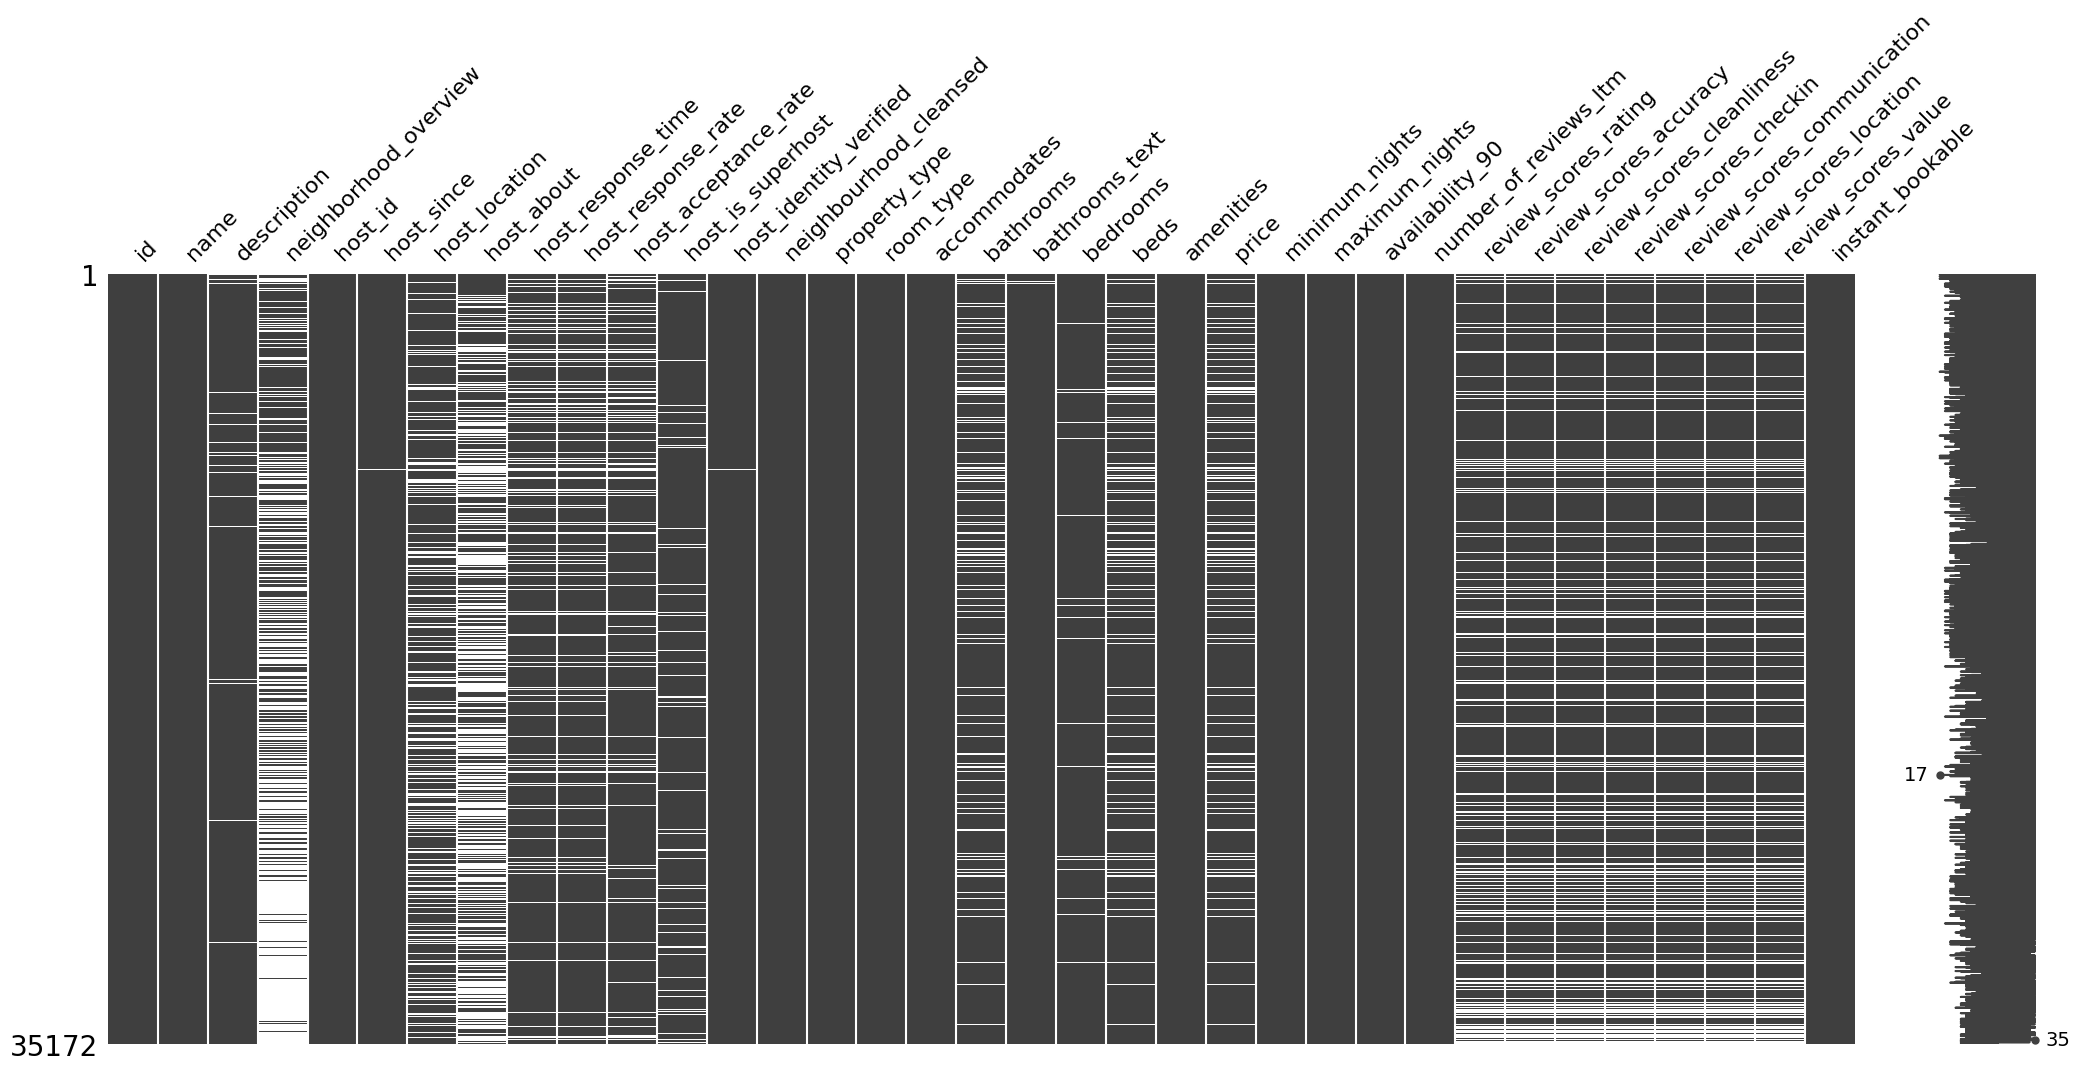

In [ ]:
# Detectar patrón de missing.
import missingno as msno
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
msno.matrix(df_listings_limpio)

In [ ]:
!pip install pyampute

 Realizamos Test de Little para verificar si los faltantes son MCAR (Missing Completely at Random)

In [ ]:
from pyampute.exploration.mcar_statistical_tests import MCARTest
import numpy as np
import pandas as pd

def prep_for_little(df, rare_min=3):
    X = df.copy()

    # bool -> float
    for c in X.select_dtypes(include=["bool"]).columns:
        X[c] = X[c].astype(float)

    # object/category -> codes preservando NaN
    for c in X.select_dtypes(include=["object","category"]).columns:
        s = X[c].astype("category")
        vc = s.value_counts(dropna=True)
        rare = vc[vc < rare_min].index
        s = s.where(~s.isin(rare), other=np.nan)
        codes = s.cat.codes.astype("float")
        X[c] = codes.replace(-1.0, np.nan)

    # forzar numérico, quitar columnas constantes / todas NaN
    X = X.apply(pd.to_numeric, errors="coerce")
    X = X.loc[:, X.nunique(dropna=True) > 1]
    X = X.loc[:, X.notna().any()]
    return X

def little_test(df, rare_min=3):
    X = prep_for_little(df, rare_min=rare_min)
    mt = MCARTest(method="little")
    res = mt.little_mcar_test(X)   # en 0.0.3 suele ser un float (p-value)

    # soporta float o dict
    if isinstance(res, dict):
        p = float(res.get('p_value', np.nan))
        chi2 = res.get('chi2', None)
        df_chi = res.get('df', None)
    else:
        p = float(res)
        chi2, df_chi = None, None

    print(f"Cols usadas: {X.shape[1]} | Filas: {X.shape[0]}")
    if chi2 is None:
        print(f"Little MCAR -> p={p:.6g}")
    else:
        print(f"Little MCAR -> chi2={chi2:.3f}, df={df_chi}, p={p:.6g}")
    return p, X


In [ ]:
# para df_reviews
p_all, X_all = little_test((df_reviews), rare_min=3)

Cols usadas: 6 | Filas: 985786
Little MCAR -> p=0


In [ ]:
#para df_calendar
p_all, X_all = little_test((df_calendar), rare_min=3)

Cols usadas: 6 | Filas: 12837777
Little MCAR -> p=0


In [ ]:
#para df_listings
p_all, X_all = little_test((df_listings_limpio), rare_min=3)

Cols usadas: 35 | Filas: 35172
Little MCAR -> p=0


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

# Imputamos todo menos las columnas con demasiados nulos (>20%) y las columnas no numéricas
cols_excluir = ['neighborhood_overview', 'host_location', 'host_about', 'name', 'description', 'bathrooms_text', 'amenities', 'host_response_time', 'host_is_superhost', 'host_identity_verified']
cols_a_imputar = df_listings_limpio.drop(columns=cols_excluir).select_dtypes(include=np.number).columns

# Aplicamos el imputer y reconstruimos el DataFrame con los nombres
imputed_array = imputer.fit_transform(df_listings_limpio[cols_a_imputar])
df_listings_limpio[cols_a_imputar] = imputed_array

#host_about, host_location y neighborhood_overview las borramos ya que tienen >20% nulos y son texto, las borramos
cols_a_borrar = ['host_location', 'host_about', 'neighborhood_overview']
df_listings_limpio = df_listings_limpio.drop(columns=cols_a_borrar)


In [ ]:
#que muestre todos los valores distintos de bathrooms
display(df_listings_limpio['bathrooms'].unique())
#como es discreta y solo deberian ser enteros o ,5 los redondeamos a 0,5 mas cercano
df_listings_limpio['bathrooms'] = (df_listings_limpio['bathrooms'] * 2).round().div(2)

#con bedrooms lo mismo pero tiene que ser entero si o si
df_listings_limpio['bedrooms'] = (df_listings_limpio['bedrooms'] * 2).round().div(2)


array([ 1. ,  1.2,  1.5,  1.1,  5.5,  2.5,  2. ,  0. ,  2.4,  0.8,  3. ,
        6. ,  2.2,  1.4,  1.7,  4.5,  2.3,  4. ,  1.8,  3.5,  3.1,  2.1,
        5. ,  1.3,  1.6,  0.5,  1.9,  9. ,  8. ,  0.9, 22. ,  5.3,  7. ,
        3.4,  0.7,  6.5,  2.7, 10. ,  9.5,  2.9,  4.8,  2.8, 16. ,  7.5,
       13. ,  8.5,  2.6, 12.5,  3.8, 15. , 20. ])

In [ ]:
#para df_calendar
# Imputamos todo menos las columnas con demasiados nulos (>20%) y las columnas no numéricas
cols_excluir = ['date']
cols_a_imputar = df_calendar.drop(columns=cols_excluir).select_dtypes(include=np.number).columns

# Aplicamos el imputer y reconstruimos el DataFrame con los nombres
imputed_array = imputer.fit_transform(df_calendar[cols_a_imputar])
df_calendar[cols_a_imputar] = imputed_array

#para miminum y maximimum nights rendondeamos al proximo entero mas cercano en caso de ser decimal
df_calendar['minimum_nights'] = np.ceil(pd.to_numeric(df_calendar['minimum_nights'], errors='coerce')).astype('Int64')
df_calendar['maximum_nights'] = np.ceil(pd.to_numeric(df_calendar['maximum_nights'], errors='coerce')).astype('Int64')


KeyboardInterrupt: 

In [ ]:
#verificamos que no haya ningun error en coherencia
display(df_calendar.loc[df_calendar['minimum_nights'] > df_calendar['maximum_nights']])



,listing_id,date,available,price,minimum_nights,maximum_nights


In [ ]:
#para df_reviews los missings son todos textos

## 📈 Test de Normalidad
> Evaluación del cumplimiento del supuesto de distribución normal mediante el test de Shapiro–Wilk.

In [ ]:
#Test de normalidad para todas las variables numericas
from scipy.stats import shapiro

#primero nos fijamos si son normales
from scipy.stats import shapiro

# 1) Helper: elegir columnas "testearle normales"
def columnas_para_normalidad(df, excluir_contains=("id", "listing_id", "reviewer"), min_unique=20):
    num_cols = df.select_dtypes(include=np.number).columns
    cols = []
    for c in num_cols:
        name = c.lower()
        if any(tok in name for tok in excluir_contains):  # excluye IDs
            continue
        # excluye booleanos y variables con pocos valores distintos (discretas cortas)
        if pd.api.types.is_bool_dtype(df[c]):
            continue
        if df[c].nunique(dropna=True) < min_unique:
            continue
        cols.append(c)
    return cols

# series por grupo (sin NaN)
datasets=[df_calendar,df_reviews,df_listings_limpio]
for df in datasets:
  numerical_cols = columnas_para_normalidad(df)
  for col in numerical_cols:
      #realizamos test de shapiro
      #sacamos los NaN para el analisis
      muestra = df.dropna(subset=[col])
      #nos fijamos si el tamaño de la muestra es mayor a 0 antes de realizar el test
      if muestra.shape[0] > 0:
        stat, p = shapiro(muestra[col])
        print(f"Test shapiro para {col}",'Statistics=%.3f, p=%.3f' % (stat, p))
      else:
        print(f"No data to perform shapiro test for {col}")

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12836682.
  res = hypotest_fun_out(*samples, **kwds)


Test shapiro para price Statistics=0.017, p=0.000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12837763.
  res = hypotest_fun_out(*samples, **kwds)


Test shapiro para minimum_nights Statistics=0.150, p=0.000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12837763.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35172.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35172.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35172.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: sci

Test shapiro para maximum_nights Statistics=0.779, p=0.000
Test shapiro para host_response_rate Statistics=0.394, p=0.000
Test shapiro para host_acceptance_rate Statistics=0.631, p=0.000
Test shapiro para bathrooms Statistics=0.428, p=0.000
Test shapiro para bedrooms Statistics=0.588, p=0.000
Test shapiro para beds Statistics=0.626, p=0.000
Test shapiro para price Statistics=0.018, p=0.000
Test shapiro para minimum_nights Statistics=0.142, p=0.000
Test shapiro para maximum_nights Statistics=0.280, p=0.000
Test shapiro para availability_90 Statistics=0.854, p=0.000
Test shapiro para number_of_reviews_ltm Statistics=0.697, p=0.000
Test shapiro para review_scores_rating Statistics=0.568, p=0.000
Test shapiro para review_scores_accuracy Statistics=0.517, p=0.000
Test shapiro para review_scores_cleanliness Statistics=0.620, p=0.000
Test shapiro para review_scores_checkin Statistics=0.438, p=0.000
Test shapiro para review_scores_communication Statistics=0.445, p=0.000
Test shapiro para revie

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35172.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35172.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35172.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35172.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.

Al aplicar el test de Shapiro-Wilk sobre las variables numéricas de los distintos datasets, se obtuvieron valores de p menores a 0.05 en todos los casos, lo que implica rechazar la hipótesis nula de normalidad. En otras palabras, ninguna de las variables sigue una distribución normal.

Si bien el test emite advertencias (UserWarning) debido al gran tamaño de las muestras (N > 5000), lo que puede afectar la precisión del p-value, los resultados son consistentes con la observación visual de las distribuciones: la mayoría de las variables presentan asimetrías marcadas, colas largas o acumulación de valores en rangos específicos.

Por ejemplo, en el caso de la variable price, la asimetría a la derecha es muy pronunciada, con una gran concentración de precios bajos y pocos valores extremadamente altos, lo cual refuerza el resultado del test. Otras variables como minimum_nights, beds o review_scores_* también presentan desviaciones significativas respecto a la normalidad.

En conclusión, las variables analizadas no cumplen con el supuesto de normalidad, por lo que los análisis posteriores deberían considerar transformaciones (como logaritmos o Box-Cox) o métodos no paramétricos para el tratamiento estadístico de los datos.

Numerical columns for df_calendar: ['price', 'minimum_nights', 'maximum_nights']


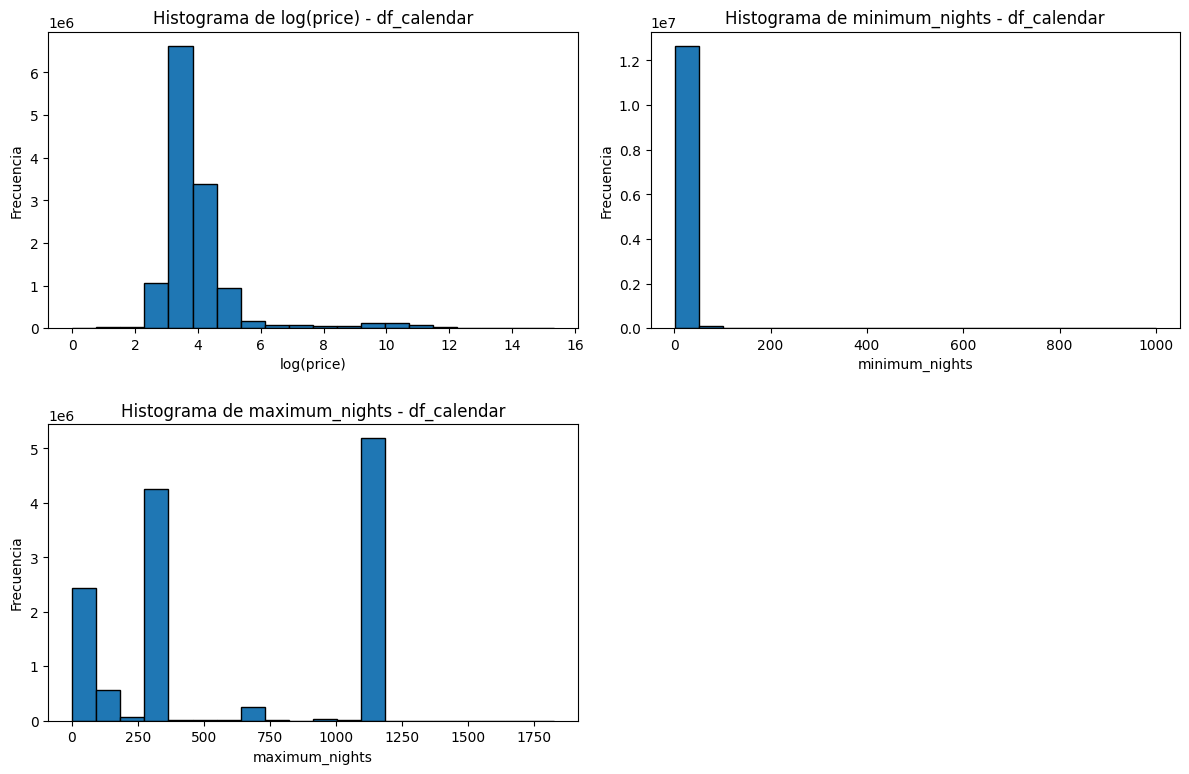

Numerical columns for df_reviews: []
No numerical columns to plot for df_reviews
Numerical columns for df_listings_limpio: ['host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_90', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


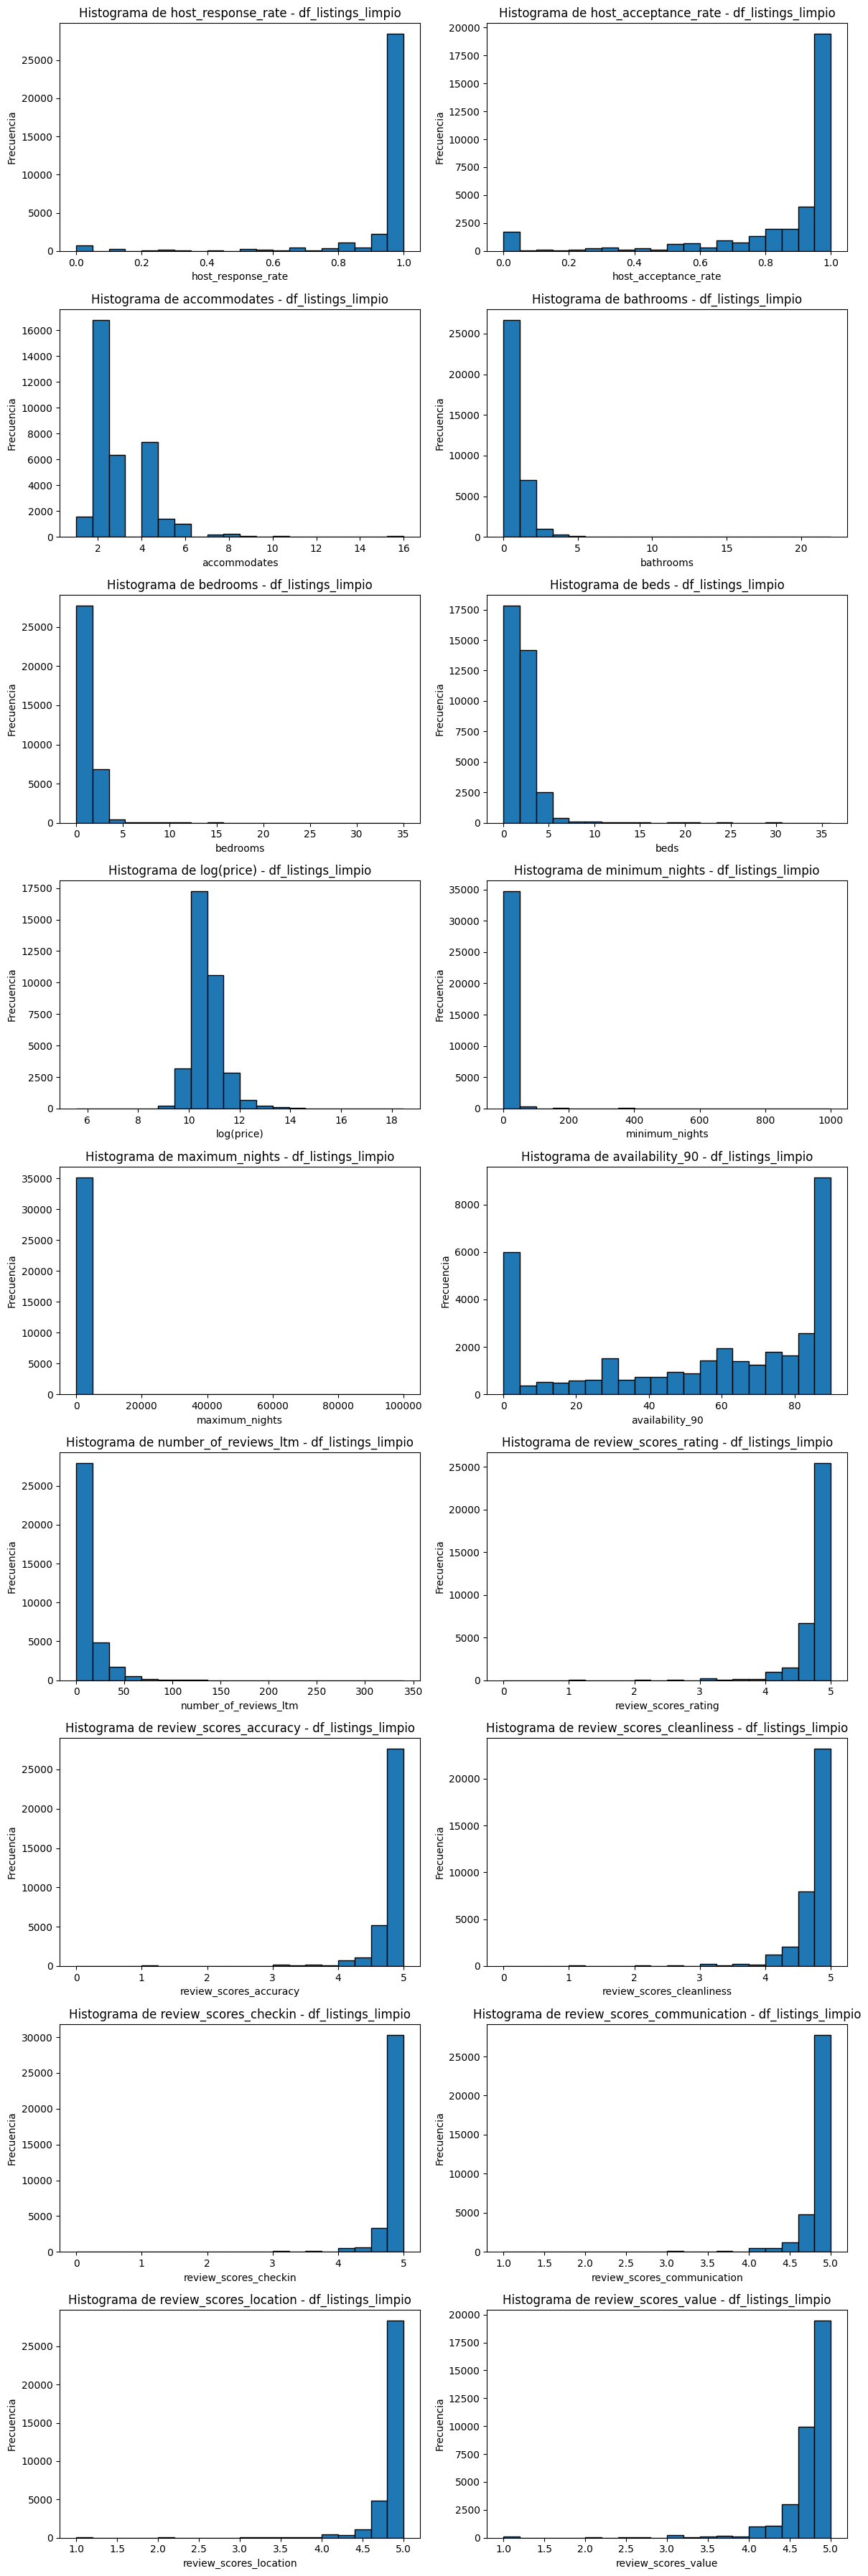

In [ ]:
#hacemos un histograma para ver distribuciones de todas las variables numericas por dataset
datasets_with_names = [(df_calendar, 'df_calendar'), (df_reviews, 'df_reviews'), (df_listings_limpio, 'df_listings_limpio')]

# 1)
def columnas_para_graficos(df, excluir_contains=("id", "listing_id", "reviewer"), min_unique=20):
    num_cols = df.select_dtypes(include=np.number).columns
    cols = []
    for c in num_cols:
        name = c.lower()
        if any(tok in name for tok in excluir_contains):  # excluye IDs
            continue
        cols.append(c)
    return cols

for df, df_name in datasets_with_names:
  numerical_cols = columnas_para_graficos(df)
  print(f"Numerical columns for {df_name}: {numerical_cols}")
  n_cols = len(numerical_cols)
  n_rows = (n_cols + 1) // 2

  if n_cols == 0:
      print(f"No numerical columns to plot for {df_name}")
      continue

  fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
  axes = axes.flatten()

  for i, col in enumerate(numerical_cols):
    #si es precio aplico lognormal antes de hacer el grafico
    if col == 'price':
      # Filtra los valores no positivos antes de aplicar log y luego elimina los valores inf
      log_price_data = df[df[col] > 0][col].apply(np.log)
      # Agrega la columna log_price permanentemente al DataFrame
      df.loc[:, 'log_price'] = log_price_data
      log_price_finite = log_price_data[np.isfinite(log_price_data)].dropna()

      if not log_price_finite.empty:
        axes[i].hist(log_price_finite, bins=20, edgecolor='black')
        axes[i].set_title(f'Histograma de log({col}) - {df_name}') # Se cambió el título para reflejar la transformación log e incluir df_name
        axes[i].set_xlabel(f'log({col})')
        axes[i].set_ylabel('Frecuencia')
      else:
        print(f"No finite values to plot for log({col}) in {df_name}")
        axes[i].set_title(f'No data for log({col}) - {df_name}')

    else:
      #filtramos valores no finitos antes de graficar
      col_finite = df[col].dropna()
      if not col_finite.empty:
        axes[i].hist(col_finite, bins=20, edgecolor='black')
        axes[i].set_title(f'Histograma de {col} - {df_name}') # Se agregó df_name al título
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
      else:
        print(f"No finite values to plot for {col} in {df_name}")
        axes[i].set_title(f'No data for {col} - {df_name}') # Agrega titulo aunque no haya data


  # Oculta cualquier subplot sin utilizar
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])


  plt.tight_layout()
  plt.show()

In [ ]:
#vimos que aplicando lognormal a los precios pueden llegar a ser normales entonces chequeamos eso
#test de shapiro para los price
from scipy.stats import shapiro
import numpy as np

#agarramos las columnas log_price de cada dataframe y les sacamos los NaN para poder hacer el calculo
log_price_calendar = df_calendar['log_price'].dropna()
log_price_listings = df_listings_limpio['log_price'].dropna()

# 1) Normalidad por grupo
print("Test shapiro para log_price en df_calendar", shapiro(log_price_calendar))
print("Test shapiro para log_price en df_listing",shapiro(log_price_listings))

Test shapiro para log_price en df_calendar ShapiroResult(statistic=np.float64(0.6343457270879485), pvalue=np.float64(7.129809311773538e-207))
Test shapiro para log_price en df_listing ShapiroResult(statistic=np.float64(0.87842521646144), pvalue=np.float64(7.162450386946606e-94))


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12836682.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35172.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#como no es normal eliminamos esa transformacion
del df_listings_limpio['log_price']
del df_calendar['log_price']

## 🚨 Detección de Outliers
> Identificación de valores atípicos mediante transformaciones Box–Cox y análisis de z-scores.


In [ ]:
"""import numpy as np
import pandas as pd
from scipy.stats import boxcox, yeojohnson

# --- Función 1: transforma usando Box-Cox o Yeo-Johnson ---
def transform_bc_yj(s: pd.Series):
    notna = s.notna().values
    x = s.values[notna]
    if x.size == 0:
        return np.array([]), None, "sin_datos", notna
    if np.all(x > 0):
        try:
            x_t, lam = boxcox(x)
            metodo = "Box-Cox"
        except Exception:
            x_t, lam = yeojohnson(x)
            metodo = "Yeo-Johnson (fallback)"
    else:
        x_t, lam = yeojohnson(x)
        metodo = "Yeo-Johnson"
    return x_t, lam, metodo, notna

# --- Función 2: busca outliers sobre la transformada ---
def outliers_on_transformed(s: pd.Series, threshold: float = 3.0, add_flag=False):
    x_t, lam, metodo, notna = transform_bc_yj(s)
    if x_t.size == 0:
        mask = pd.Series(False, index=s.index)
        return mask, {"count": 0, "lambda": None, "method": "sin_datos"}
    std = np.std(x_t)
    if std == 0 or np.isnan(std):
        mask_valid = np.zeros_like(x_t, dtype=bool)
    else:
        z = (x_t - np.mean(x_t)) / std
        mask_valid = np.abs(z) > threshold
    mask_np = np.zeros(len(s), dtype=bool)
    mask_np[notna] = mask_valid
    mask = pd.Series(mask_np, index=s.index)
    if add_flag:
        s.parent[f"{s.name}_outlier"] = mask  # crea col <col>_outlier
    return mask, {"count": int(mask_valid.sum()), "lambda": lam, "method": metodo}

# --- Loop sobre los dataframes ---
for df_name, df in {"calendar": df_calendar, "reviews": df_reviews, "listings": df_listings_limpio}.items():
    numerical_cols = df.select_dtypes(include=np.number).columns
    print(f"\n📊 Analizando {df_name} ({len(numerical_cols)} variables numéricas)")
    resultados = {}
    for col in numerical_cols:
        mask, info = outliers_on_transformed(df[col], threshold=3)
        resultados[col] = (info["count"], info["lambda"], info["method"])
        # si querés agregar las columnas de flag directamente:
        df[f"{col}_outlier"] = mask
    resumen = pd.DataFrame(resultados, index=["count", "lambda", "method"]).T
    display(resumen)
"""

'import numpy as np\nimport pandas as pd\nfrom scipy.stats import boxcox, yeojohnson\n\n# --- Función 1: transforma usando Box-Cox o Yeo-Johnson ---\ndef transform_bc_yj(s: pd.Series):\n    notna = s.notna().values\n    x = s.values[notna]\n    if x.size == 0:\n        return np.array([]), None, "sin_datos", notna\n    if np.all(x > 0):\n        try:\n            x_t, lam = boxcox(x)\n            metodo = "Box-Cox"\n        except Exception:\n            x_t, lam = yeojohnson(x)\n            metodo = "Yeo-Johnson (fallback)"\n    else:\n        x_t, lam = yeojohnson(x)\n        metodo = "Yeo-Johnson"\n    return x_t, lam, metodo, notna\n\n# --- Función 2: busca outliers sobre la transformada ---\ndef outliers_on_transformed(s: pd.Series, threshold: float = 3.0, add_flag=False):\n    x_t, lam, metodo, notna = transform_bc_yj(s)\n    if x_t.size == 0:\n        mask = pd.Series(False, index=s.index)\n        return mask, {"count": 0, "lambda": None, "method": "sin_datos"}\n    std = np.st

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# --- Función 1: transforma usando Box-Cox, moviendo si hay ≤0 ---
def transform_boxcox_shift(s: pd.Series):
    notna = s.notna().values
    x = s.values[notna]
    if x.size == 0:
        return np.array([]), None, "sin_datos", notna

    # Si hay valores ≤ 0, mover toda la variable
    shift = 0
    if np.any(x <= 0):
        shift = -x.min() + 1e-6
        x = x + shift

    try:
        x_t, lam = boxcox(x)
        metodo = f"Box-Cox (shift={shift:.3f})" if shift > 0 else "Box-Cox"
    except Exception:
        # Si Box-Cox igual falla, devuelve vacíos
        return np.array([]), None, "error_BoxCox", notna

    return x_t, lam, metodo, notna

# --- Función 2: busca outliers con z-score ---
def outliers_on_transformed(s: pd.Series, threshold: float = 3.0):
    x_t, lam, metodo, notna = transform_boxcox_shift(s)
    if x_t.size == 0:
        mask = pd.Series(False, index=s.index)
        return mask, {"count": 0, "lambda": None, "method": metodo}

    std = np.std(x_t)
    if std == 0 or np.isnan(std):
        mask_valid = np.zeros_like(x_t, dtype=bool)
    else:
        z = (x_t - np.mean(x_t)) / std
        mask_valid = np.abs(z) > threshold

    mask_full = pd.Series(False, index=s.index)
    mask_full.iloc[notna] = mask_valid
    return mask_full, {"count": int(mask_valid.sum()), "lambda": lam, "method": metodo}

# --- Loop sobre los dataframes ---
for df_name, df in {"calendar": df_calendar, "reviews": df_reviews, "listings": df_listings_limpio}.items():
    df = df.copy()  # evitar SettingWithCopyWarning
    numerical_cols = df.select_dtypes(include=np.number).columns
    print(f"\n📊 Analizando {df_name} ({len(numerical_cols)} variables numéricas)")
    resultados = {}
    for col in numerical_cols:
        mask, info = outliers_on_transformed(df[col], threshold=3)
        resultados[col] = (info["count"], info["lambda"], info["method"])
        df[f"{col}_outlier"] = mask
    resumen = pd.DataFrame(resultados, index=["count", "lambda", "method"]).T
    display(resumen)


📊 Analizando calendar (4 variables numéricas)


KeyboardInterrupt: 

In [ ]:
df_listings_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           35172 non-null  float64       
 1   name                         35172 non-null  object        
 2   description                  34299 non-null  object        
 3   host_id                      35172 non-null  float64       
 4   host_since                   35166 non-null  datetime64[ns]
 5   host_response_time           30943 non-null  object        
 6   host_response_rate           35172 non-null  float64       
 7   host_acceptance_rate         35172 non-null  float64       
 8   host_is_superhost            33071 non-null  object        
 9   host_identity_verified       35166 non-null  object        
 10  neighbourhood_cleansed       35172 non-null  object        
 11  property_type                35172 non-nu

Al analizar las variables numéricas de los distintos datasets se identificó la presencia de valores atípicos en la mayoría de ellas. Sin embargo, en muchos casos estos outliers no representan errores de medición o datos incorrectos, sino que reflejan la estructura real y la naturaleza asimétrica de las distribuciones.

Particularmente en la variable price, se observa una cola larga a la derecha, donde el 99 % de los alojamientos tiene precios por debajo de aproximadamente 350 000, pero existe un pequeño grupo (menos del 0,1 %) con valores que superan los $4 700 000, correspondientes a propiedades de lujo. Esto genera una alta curtosis y explica la gran cantidad de observaciones identificadas como outliers por métodos estadísticos como la transformación Box-Cox y el z-score.

En general, los outliers detectados reflejan características propias del mercado (diferencias extremas en precio, tamaño o cantidad de habitaciones) y no deben eliminarse, ya que aportan información relevante sobre la heterogeneidad de la oferta. No obstante, para ciertos análisis descriptivos o visualizaciones puede ser conveniente tratarlos de forma diferenciada o excluir únicamente los casos más extremos (por ejemplo, por encima del percentil 99.9).

In [ ]:
df_listings_limpio.head()

,id,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,...,availability_90,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,11508.0,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS 1 BDRM APT- POOL/ GYM/ 24-HR SECURIT...,42762.0,2009-10-01,within an hour,1.00,0.79,True,True,...,25.0,5.0,4.82,4.930,4.88,4.930,4.980,4.93,4.860,False
1,14222.0,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,87710233.0,2016-08-03,within an hour,1.00,1.00,False,True,...,44.0,8.0,4.77,4.760,4.77,4.820,4.900,4.87,4.750,False
2,15074.0,ROOM WITH RIVER SIGHT,NaN,59338.0,2009-12-02,NaN,0.98,0.93,False,False,...,0.0,0.0,4.65,4.758,4.60,4.884,4.864,4.70,4.672,False
3,16695.0,DUPLEX LOFT 2 - SAN TELMO,NaN,64880.0,2009-12-21,within an hour,0.95,0.94,True,True,...,90.0,0.0,4.28,4.590,4.29,4.830,4.800,4.39,4.410,True
4,20062.0,PENTHOUSE /Terrace & pool /City views /2bedrooms,NaN,75891.0,2010-01-31,within an hour,1.00,0.99,NaN,True,...,29.0,25.0,4.93,4.920,4.87,4.940,4.930,4.93,4.790,False


In [ ]:
# ============================
#     Isolation Forest
# ============================
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05, random_state=42)
#agarramos solo las variables que tienen sentido evaluar

# 1) Seleccionamos columnas numéricas y excluyo IDs
num_cols = df_listings_limpio.select_dtypes(include=np.number).columns.tolist()
id_like = [c for c in num_cols if 'id' in c.lower()]  # ejemplo: 'id', 'listing_id', 'host_id'
feat_cols = [c for c in num_cols if c not in id_like]

print(feat_cols)

df_listings_limpio["outlier_iso"] = iso.fit_predict(df_listings_limpio[feat_cols])

df_out_iforest = df_listings_limpio[df_listings_limpio["outlier_iso"] == -1]

print("Outliers detectados (Isolation Forest):")
print(df_out_iforest[['id','price','host_id','bathrooms','bedrooms','outlier_iso']])

['host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_90', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
Outliers detectados (Isolation Forest):
                 id     price      host_id  bathrooms  bedrooms  outlier_iso
10     6.880000e+04  362325.0     221405.0        5.5       4.0           -1
24     7.220400e+04  340722.0     373629.0        2.0       4.0           -1
38     7.799400e+04   48005.0      64880.0        0.0       1.0           -1
83     1.072590e+05  404334.0     555693.0        6.0       7.0           -1
118    1.544300e+05   21004.0     742738.0        1.0       1.0           -1
...             ...       ...          ...        ...       ...          ...
34944  1.337804e+18   16803.0  673989632.0        3.

In [ ]:
# ============================
#     Local Outlier Factor
# ============================
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df_listings_limpio["outlier_lof"] = lof.fit_predict(df_listings_limpio[feat_cols])

df_out_lof = df_listings_limpio[df_listings_limpio["outlier_lof"] == -1]

print("Outliers detectados (Local Outlier Factor):")
print(df_out_lof[['id','price','bathrooms','bedrooms','outlier_iso','outlier_lof']])

Outliers detectados (Local Outlier Factor):
                 id    price  bathrooms  bedrooms  outlier_iso  outlier_lof
19     3.192000e+04  99709.8        1.0       1.0            1           -1
33     4.853500e+04  52511.0        2.0       1.0            1           -1
44     6.128200e+04  38858.0        2.0       1.0            1           -1
49     7.835100e+04  54611.0        1.5       1.0            1           -1
67     8.594900e+04  20809.0        1.0       1.0            1           -1
...             ...      ...        ...       ...          ...          ...
35044  1.342744e+18  42102.0        1.0       1.0            1           -1
35054  1.339334e+18  12844.0        2.5       2.0            1           -1
35091  1.340182e+18  31507.0        1.0       1.0            1           -1
35100  1.343550e+18  41862.0        1.5       2.0            1           -1
35151  1.341300e+18  35770.0        1.0       1.0            1           -1

[1759 rows x 6 columns]


In [ ]:
#muestro los que tienen outlier_iso o outlier_lof
df_listings_limpio[(df_listings_limpio['outlier_iso'] == -1) | (df_listings_limpio['outlier_lof'] == -1)]

,id,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,outlier_iso,outlier_lof
10,6.880000e+04,Recoleta great penthouse w/private terrace &g...,"In the heart of the Recoleta District, the mos...",221405.0,2010-09-02,within a day,1.000,0.830,False,True,...,4.540,4.520,4.270,4.870,4.890,4.970,4.430,False,-1,1
19,3.192000e+04,Beautifull apartment in Belgrano!,NaN,137373.0,2010-06-02,NaN,1.000,1.000,False,False,...,4.756,4.816,4.658,4.848,4.852,4.858,4.708,False,1,-1
24,7.220400e+04,Beautiful house in Palermo SOHO,Gorriti rental house is at the heart of Palerm...,373629.0,2011-02-01,within an hour,1.000,0.770,True,True,...,4.990,4.970,4.850,4.990,4.990,5.000,4.880,False,-1,1
33,4.853500e+04,Elegant apartment in downtown Bs.As,Minimum rental period: 6 months,221044.0,2010-09-02,NaN,1.000,0.800,False,True,...,4.846,4.868,4.790,4.936,4.938,4.940,4.842,False,1,-1
38,7.799400e+04,Studio 1A - Corazon de San Telmo,"This unit on 1st floor, particularly street ov...",64880.0,2009-12-21,within an hour,0.950,0.940,True,True,...,4.000,3.710,4.140,4.430,4.570,4.860,4.140,True,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35091,1.340182e+18,departamento luminoso,"This lovely apartment, located on the front, v...",340990355.0,2020-03-09,within a few hours,1.000,0.978,False,True,...,4.700,4.900,4.900,5.000,4.900,4.900,4.900,True,1,-1
35100,1.343550e+18,Tu hogar acogedor en Caballito,Enjoy the comfort of a welcoming home in Cabal...,461085342.0,2022-05-26,NaN,0.930,0.000,False,True,...,4.700,4.900,4.900,5.000,4.900,4.900,4.900,True,1,-1
35101,1.343589e+18,Luxury House in of Heart of Belgrano,"3 ensuite bedrooms, rooftop BBQ and abundant a...",673167607.0,2025-01-15,NaN,0.998,0.644,False,True,...,4.700,4.900,4.900,5.000,4.900,4.900,4.900,False,-1,1
35117,1.343646e+18,Seguridad 24x7 y 2 cocheras,"Elegant apartment in Caballito with 5 rooms, i...",153190460.0,2017-10-03,within an hour,1.000,0.680,False,True,...,4.700,4.900,4.900,5.000,4.900,4.900,4.900,False,-1,1


In [ ]:
df_listings_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           35172 non-null  float64       
 1   name                         35172 non-null  object        
 2   description                  34299 non-null  object        
 3   host_id                      35172 non-null  float64       
 4   host_since                   35166 non-null  datetime64[ns]
 5   host_response_time           30943 non-null  object        
 6   host_response_rate           35172 non-null  float64       
 7   host_acceptance_rate         35172 non-null  float64       
 8   host_is_superhost            33071 non-null  object        
 9   host_identity_verified       35166 non-null  object        
 10  neighbourhood_cleansed       35172 non-null  object        
 11  property_type                35172 non-nu

PCA para hacer outliers

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df_listings_limpio[feat_cols].iloc[1::])

pca = PCA()
pca.fit(X)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)


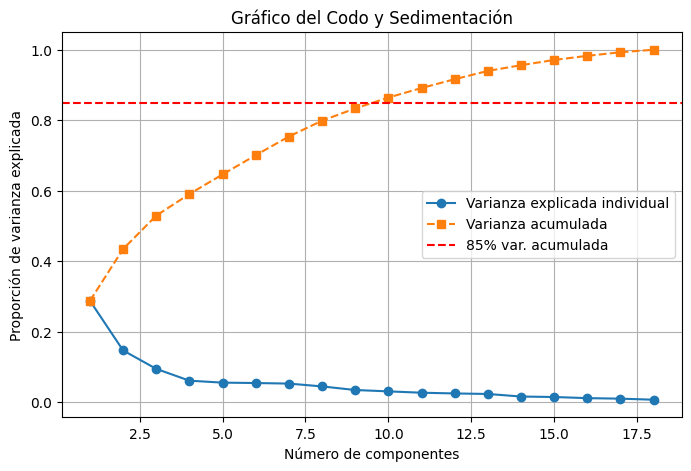

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp)+1), var_exp, 'o-', label="Varianza explicada individual")
plt.plot(range(1, len(var_exp)+1), cum_var_exp, 's--', label="Varianza acumulada")
plt.axhline(y=0.85, color='red', linestyle='--', label='85% var. acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Proporción de varianza explicada')
plt.title('Gráfico del Codo y Sedimentación')
plt.legend()
plt.grid(True)
plt.show()

El scree plot ubica el “codo” en ≈10 componentes, que explican ~85% de la varianza. Para evitar una reducción tan alta (10 PCs) y no arriesgar la pérdida de anomalías en direcciones de baja varianza, no usaremos PCA para la detección. El análisis multivariado de outliers (ISO y LOF) se hará en el espacio original estandarizado

Optamos por Isolation Forest para la detección multivariada de outliers porque es robusto y escalable en alta dimensionalidad y no depende de suposiciones de densidad local como LOF, lo que lo hace más estable ante variables correlacionadas.

In [ ]:
#imputamos los outliers de ISO
#como son variables que no pueden ser reemplazadas por su mediana debido al contexto, decidimos eliminar los registros directamente

# 1)
vals = pd.unique(df_listings_limpio['outlier_iso'].dropna())
out_flag = -1 if (-1 in vals) else 1

# 2) Máscara de filas a borrar
mask_out = df_listings_limpio['outlier_iso'].eq(out_flag)

# 3) guardo los outliers aparte
outliers_guardados = df_listings_limpio.loc[mask_out].copy()

# 4) Elimino filas completas
n0 = len(df_listings_limpio)
df_listings_limpio = df_listings_limpio.loc[~mask_out].reset_index(drop=True)
print(f"Eliminadas: {mask_out.sum()} filas ({mask_out.mean():.2%}). Restantes: {len(df_listings_limpio)}/{n0}")


Eliminadas: 1759 filas (5.00%). Restantes: 33413/35172


# Conclusiones preliminares

Hipótesis 1:



Los precios en barrios turísticos (Palermo, Recoleta, San Telmo) son sistemáticamente más altos que en barrios periféricos.

In [ ]:
df_listings_limpio['neighbourhood_cleansed'].unique()

array(['Palermo', 'Nuñez', 'Monserrat', 'Constitucion', 'Recoleta',
       'San Nicolas', 'Chacarita', 'Belgrano', 'Retiro', 'San Telmo',
       'Boedo', 'Colegiales', 'Almagro', 'Villa Crespo', 'Balvanera',
       'Puerto Madero', 'Caballito', 'Coghlan', 'Parque Chacabuco',
       'Villa Urquiza', 'Boca', 'Villa Luro', 'Villa Devoto',
       'San Cristobal', 'Flores', 'Monte Castro', 'Villa Ortuzar',
       'Villa Gral. Mitre', 'Barracas', 'Saavedra', 'Villa Del Parque',
       'Floresta', 'Paternal', 'Villa Pueyrredon', 'Villa Santa Rita',
       'Velez Sarsfield', 'Parque Patricios', 'Parque Avellaneda',
       'Villa Real', 'Parque Chas', 'Villa Lugano', 'Agronomia',
       'Mataderos', 'Versalles', 'Liniers', 'Nueva Pompeya',
       'Villa Riachuelo', 'Villa Soldati'], dtype=object)

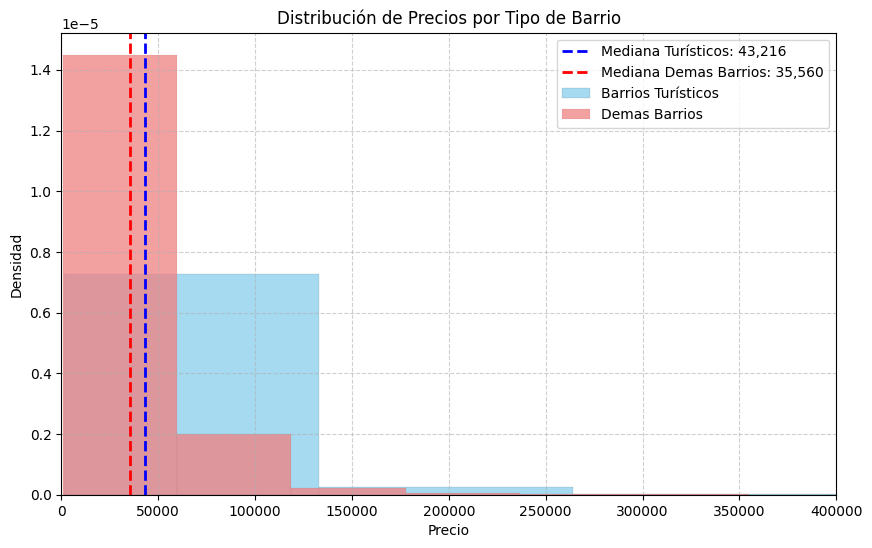

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(tur, color="skyblue", label="Barrios Turísticos", bins=800, stat="density", common_norm=False)
sns.histplot(peri, color="lightcoral", label="Demas Barrios", bins=800, stat="density", common_norm=False)

plt.axvline(med_tur, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana Turísticos: {med_tur:,.0f}')
plt.axvline(med_peri, color='red', linestyle='dashed', linewidth=2, label=f'Mediana Demas Barrios: {med_peri:,.0f}')

plt.title('Distribución de Precios por Tipo de Barrio')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 400000)
plt.show()

In [ ]:
all_amenities = [item.strip('[]" ') for sublist in df_listings_limpio['amenities'] for item in sublist.split(',')]

unique_amenities = set(all_amenities)

pool_amenities = [amenity for amenity in sorted(list(unique_amenities)) if 'free ' in amenity.lower() and ' parking ' in amenity.lower()]

print("Unique Amenities containing 'pool':")
for amenity in pool_amenities:
    print(amenity)

Unique Amenities containing 'pool':
Free driveway parking on premises
Free driveway parking on premises \u2013 1 space
Free driveway parking on premises \u2013 6 spaces
Free parking garage on premises
Free parking garage on premises \u2013 1 space
Free parking garage on premises \u2013 100 spaces
Free parking garage on premises \u2013 2 spaces
Free parking garage on premises \u2013 28 spaces
Free parking garage on premises \u2013 52 spaces
Free parking on premises
Free parking on premises \u2013 1 space
Free parking on premises \u2013 2 spaces
Free parking on premises \u2013 68 spaces


In [ ]:
df_listings_limpio['has_gym'] = df_listings_limpio['amenities'].str.contains(' gym ', case=False, na=False)
df_listings_limpio['has_pool'] = df_listings_limpio['amenities'].str.contains(' pool ', case=False, na=False)
df_listings_limpio['has_free_parking'] = df_listings_limpio['amenities'].str.contains('free ') & df_listings_limpio['amenities'].str.contains(' parking', case=False, na=False)

df_listings_limpio[['amenities', 'has_gym', 'has_pool', 'has_free_parking']].head()

,amenities,has_gym,has_pool,has_free_parking
0,"[""Bathtub"", ""Air conditioning"", ""Bed linens"", ...",False,False,False
1,"[""Bathtub"", ""Air conditioning"", ""TV"", ""Heating...",False,False,False
2,"[""Washer"", ""Air conditioning"", ""Dryer"", ""TV wi...",False,False,False
3,"[""Backyard"", ""Air conditioning"", ""Patio or bal...",False,False,False
4,"[""Bathtub"", ""Shared outdoor pool - available a...",False,True,False


In [ ]:
def get_amenity_combination(row):
    has_gym = row['has_gym']
    has_pool = row['has_pool']
    has_free_parking = row['has_free_parking']

    if has_gym and has_pool and has_free_parking:
        return 'all_three'
    elif has_gym and has_pool:
        return 'gym_and_pool'
    elif has_gym and has_free_parking:
        return 'gym_and_free_parking'
    elif has_pool and has_free_parking:
        return 'pool_and_free_parking'
    elif has_gym:
        return 'gym_only'
    elif has_pool:
        return 'pool_only'
    elif has_free_parking:
        return 'free_parking_only'
    else:
        return 'none'

df_listings_limpio['amenity_combination'] = df_listings_limpio.apply(get_amenity_combination, axis=1)

display(df_listings_limpio['amenity_combination'].value_counts())

,count
amenity_combination,
none,28895
pool_only,1910
gym_and_pool,1096
gym_only,981
all_three,306
gym_and_free_parking,95
free_parking_only,93
pool_and_free_parking,37


In [ ]:
amenity_price_rating = df_listings_limpio.groupby('amenity_combination')[['price', 'review_scores_rating']].agg('mean')
display(amenity_price_rating)

,price,review_scores_rating
amenity_combination,,
all_three,97089.287310,4.870609
free_parking_only,222052.465231,4.837341
gym_and_free_parking,94485.159259,4.799000
gym_and_pool,73492.784842,4.831802
gym_only,64067.103020,4.825339
none,91421.378512,4.819768
pool_and_free_parking,80053.501463,4.844512
pool_only,54618.752689,4.821484


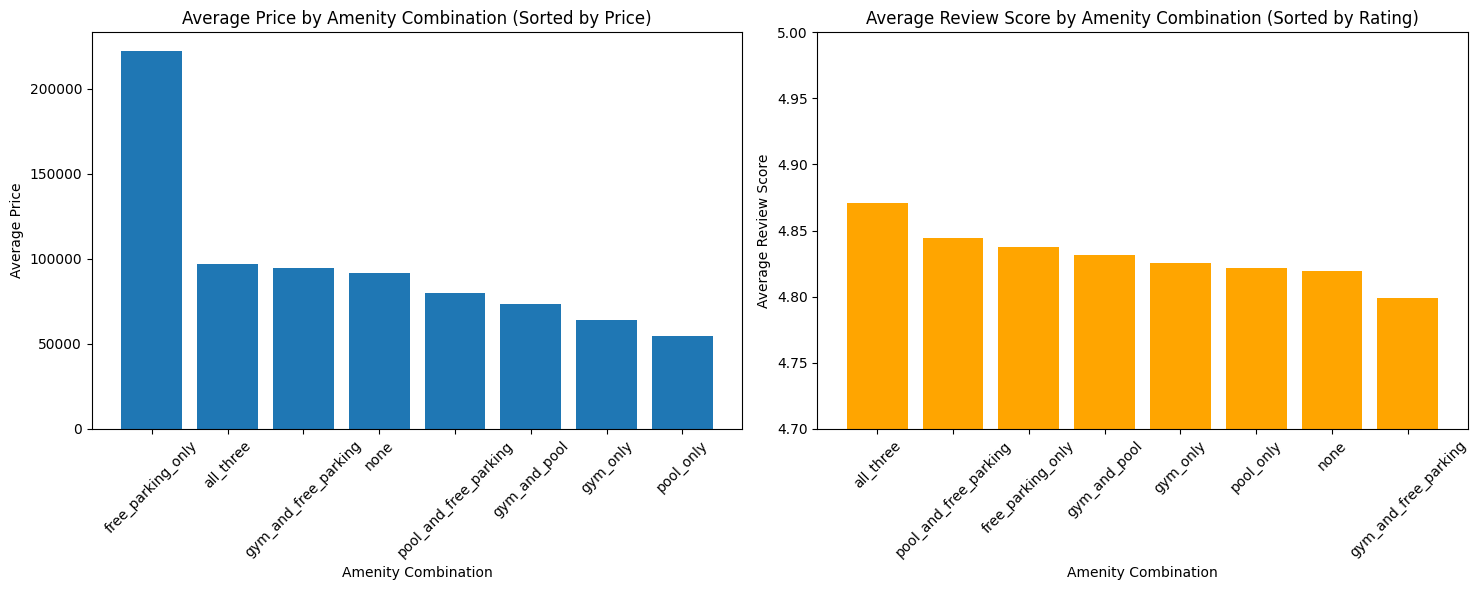

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

amenity_price_rating_sorted_price = amenity_price_rating.sort_values('price', ascending=False)
axes[0].bar(amenity_price_rating_sorted_price.index, amenity_price_rating_sorted_price['price'])
axes[0].set_title('Average Price by Amenity Combination (Sorted by Price)')
axes[0].set_xlabel('Amenity Combination')
axes[0].set_ylabel('Average Price')
axes[0].tick_params(axis='x', rotation=45)

amenity_price_rating_sorted_rating = amenity_price_rating.sort_values('review_scores_rating', ascending=False)
axes[1].bar(amenity_price_rating_sorted_rating.index, amenity_price_rating_sorted_rating['review_scores_rating'], color='orange')
axes[1].set_title('Average Review Score by Amenity Combination (Sorted by Rating)')
axes[1].set_xlabel('Amenity Combination')
axes[1].set_ylabel('Average Review Score')
axes[1].tick_params(axis='x', rotation=45)
plt.ylim(4.7, 5)
plt.tight_layout()
plt.show()

In [ ]:
df_listings_limpio.columns

Index(['id', 'name', 'description', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'availability_90',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'outlier_iso', 'outlier_lof', 'has_gym', 'has_pool', 'has_free_parking',
       'amenity_combination'],
      dtype='object')

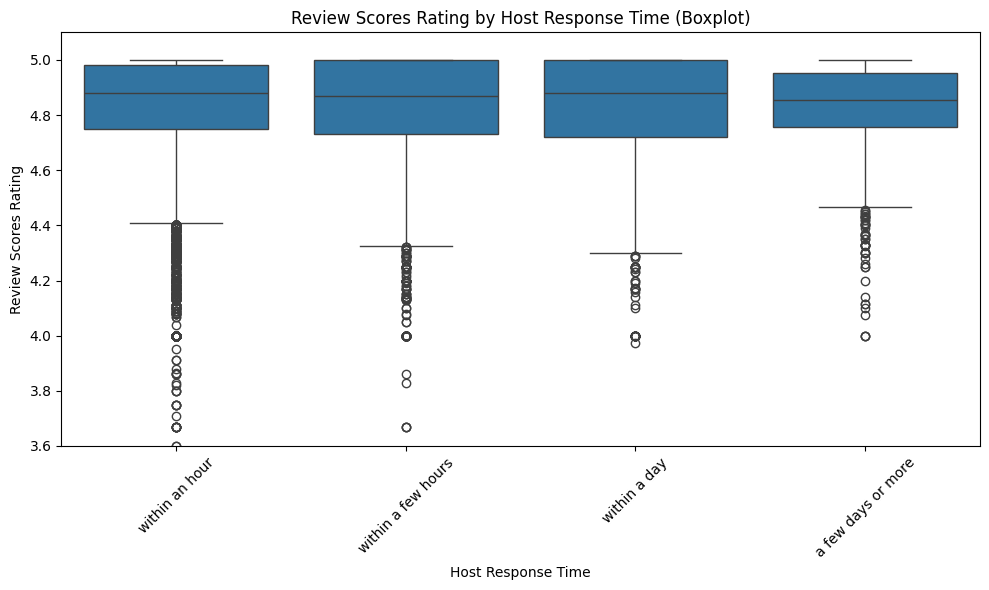

In [ ]:

plot_data = df_listings_limpio[['host_response_time', 'review_scores_rating']].dropna().copy()

order = ['within an hour', 'within a few hours', 'within a day', 'a few days or more']
plot_data['host_response_time'] = pd.Categorical(plot_data['host_response_time'], categories=order, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='host_response_time', y='review_scores_rating', data=plot_data)
plt.title('Review Scores Rating by Host Response Time (Boxplot)')
plt.xlabel('Host Response Time')
plt.ylabel('Review Scores Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(3.6, 5.1)
plt.show()

In [ ]:
df_listings_limpio.columns

Index(['id', 'name', 'description', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'availability_90',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'outlier_iso', 'outlier_lof', 'has_gym', 'has_pool', 'has_free_parking',
       'amenity_combination'],
      dtype='object')

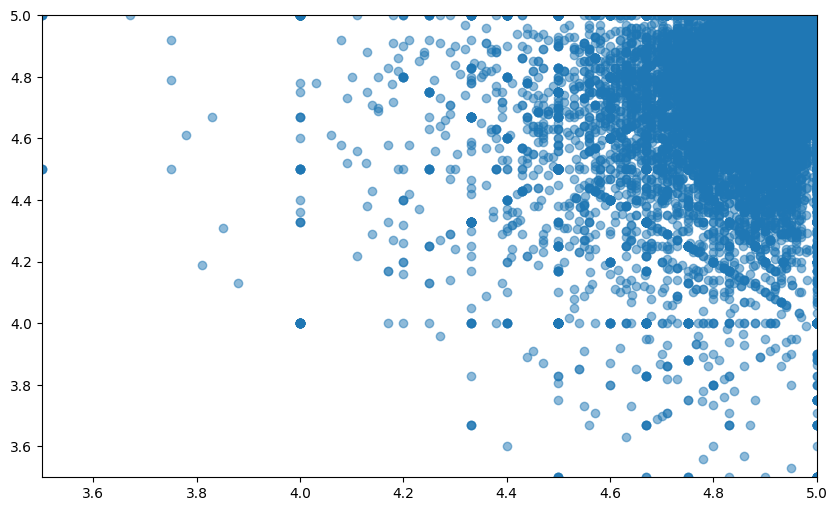

In [ ]:

plt.figure(figsize=(10, 6))
plt.ylim(3.5, 5)
plt.xlim(3.5, 5)
plt.scatter(df_listings_limpio['review_scores_location'], df_listings_limpio['review_scores_cleanliness'], alpha=0.5)